# Generating Small Molecule Embeddings with RDKit and Pytorch Geometric

Molecular Property Prediction:
- Current drug screening involves microfluidics assays on millions of molecules
- Potentially massive cost savings in drug screening / drug design
- First in-silico drugs currently undergoing clinical trials for FDA approval:

        In silico screening identified novel small-molecule antagonists of PAC1 receptor
        Ichiro Takasaki, Ai Watanabe, Masafumi Yokai, Yurie Watanabe, Daichi Hayakawa, Ryota Nagashima, Mamoru Fukuchi, Takuya Okada, Naoki Toyooka, Atsuro Miyata, Hiroaki Gouda and Takashi Kurihara
        Journal of Pharmacology and Experimental Therapeutics January 23, 2018, jpet.117.245415; DOI: https://doi.org/10.1124/jpet.117.245415
        
- ML features for molecules are... complicated
- Using raw structure data impractical due to time complexity
- Two general approaches to learn molecular representations:
    - Physics-based "fingerprinting"
    - GNN / LLM "Learned Representations" from smiles strings
- Many reliable datasets are proprietary
- Benchmarking currently relies on Therapeutics Data Commons

### Fingerprinting

In [34]:
#imports
import pandas as pd
from rdkit import Chem
from tdc.single_pred import ADME

# load data
from tdc.single_pred import ADME
data = ADME(name = 'Solubility_AqSolDB')
df = data.get_data()
df.head()

Found local copy...
Loading...
Done!


,Drug_ID,Drug,Y
0,"N,N,N-trimethyloctadecan-1-aminium bromide",CCCCCCCCCCCCCCCCCC[N+](C)(C)C.[Br-],-3.616127
1,Benzo[cd]indol-2(1H)-one,O=C1Nc2cccc3cccc1c23,-3.254767
2,4-chlorobenzaldehyde,O=Cc1ccc(Cl)cc1,-2.177078
3,"zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...",CC(c1ccccc1)c1cc(C(=O)[O-])c(O)c(C(C)c2ccccc2)...,-3.924409
4,4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...,c1cc(N(CC2CO2)CC2CO2)ccc1Cc1ccc(N(CC2CO2)CC2CO...,-4.662065


In [35]:
# Convert smiles strings to RDKit Molecules
fingerprints = df['Drug'].apply(Chem.MolFromSmiles)

# Fingerprint Conversion with Morgan Fingerprints
from rdkit.Chem import rdFingerprintGenerator

def embed(molecule):
    Chem.AddHs(molecule)
    fp = mfpgen.GetFingerprintAsNumPy(molecule)
    return fp

# initialize generator and apply conversion
mfpgen = rdFingerprintGenerator.GetMorganGenerator(radius=2,fpSize=2048)
fingerprints = fingerprints.apply(embed)

# sanity check
print(f'Embedding Length: {len(fingerprints[42])}')
fingerprints.head()


[13:14:14] WARNING: not removing hydrogen atom without neighbors
[13:14:14] WARNING: not removing hydrogen atom without neighbors
[13:14:14] WARNING: not removing hydrogen atom without neighbors
[13:14:14] WARNING: not removing hydrogen atom without neighbors
[13:14:14] WARNING: not removing hydrogen atom without neighbors
[13:14:14] WARNING: not removing hydrogen atom without neighbors
[13:14:14] WARNING: not removing hydrogen atom without neighbors
[13:14:14] WARNING: not removing hydrogen atom without neighbors
[13:14:14] WARNING: not removing hydrogen atom without neighbors
[13:14:14] WARNING: not removing hydrogen atom without neighbors
[13:14:14] WARNING: not removing hydrogen atom without neighbors
[13:14:14] WARNING: not removing hydrogen atom without neighbors
[13:14:14] WARNING: not removing hydrogen atom without neighbors
[13:14:14] WARNING: not removing hydrogen atom without neighbors
[13:14:14] WARNING: not removing hydrogen atom without neighbors
[13:14:14] WARNING: not r

Embedding Length: 2048


0    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: Drug, dtype: object

### Learned Embeddings

Molecular Property Prediction with Learned Embeddings requires 2 ML models.

Typically a GNN or LLM is pretrained to learn how to project raw molecular structures into a latent space (z) and then those embeddings are passed to a MLP for predicting things like toxicity, aqueoues solubility, etc.

Significant debate in preprint literature on the effectiveness and limitations of these approaches as compared to each other and more traditional techniques like Morgan Fingerprinting.

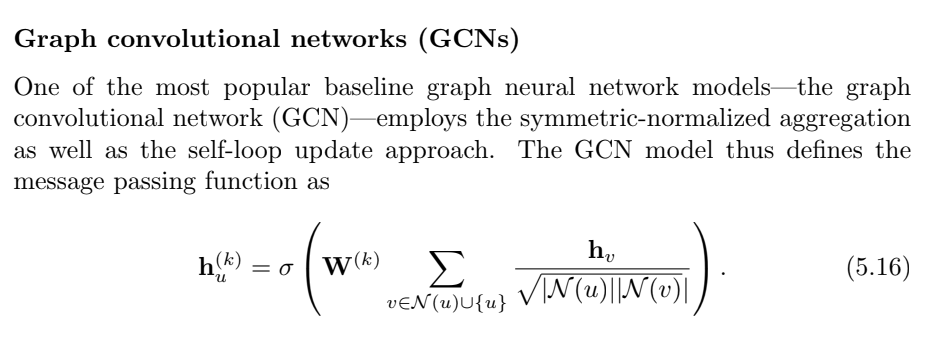

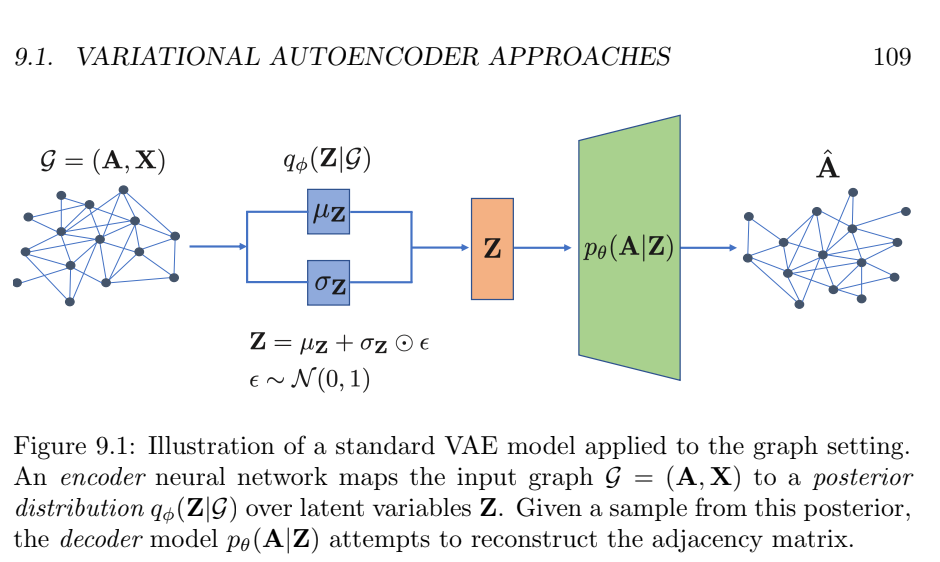

William L. Hamilton. (2020). Graph Representation Learning.
Synthesis Lectures on Artificial Intelligence and Machine Learning, Vol. 14,
No. 3 , Pages 1-159.

Link to Kipf and Welling 2016: https://arxiv.org/abs/1609.02907
(cited over 32k times per arXiv)

# Current Progress

A lot of teething issues training the GAE... 
Pre-processing script adapted from Marcus Deblander, Oxford Protein Informatics Group: https://www.blopig.com/blog/2022/02/how-to-turn-a-smiles-string-into-a-molecular-graph-for-pytorch-geometric/ 

Demonstrate the data we're working with:

In [36]:
# preprocessing script
from smiles_to_tensors import *

tensors = create_pytorch_geometric_graph_data_list_from_smiles_and_labels(df['Drug'],df['Y'])

#examples
example = tensors[0]
print("===============================================")
print(example)
print("===============================================")
print(f"Feature Matrix: {example.x}")
print(f"Edge Index: {example.edge_index}")
print(f"Edge Attributes: {example.edge_attr}")
print(f"Log Solubility: {example.y}")
print("===============================================")
print("Multiple Shapes:")
print(tensors[42])
print(tensors[64])
print(tensors[256])
print("===============================================")

[13:14:15] WARNING: not removing hydrogen atom without neighbors
[13:14:15] WARNING: not removing hydrogen atom without neighbors
[13:14:15] WARNING: not removing hydrogen atom without neighbors
[13:14:15] WARNING: not removing hydrogen atom without neighbors
[13:14:15] WARNING: not removing hydrogen atom without neighbors
[13:14:15] WARNING: not removing hydrogen atom without neighbors
[13:14:16] WARNING: not removing hydrogen atom without neighbors
[13:14:16] WARNING: not removing hydrogen atom without neighbors
[13:14:16] WARNING: not removing hydrogen atom without neighbors
[13:14:16] WARNING: not removing hydrogen atom without neighbors
[13:14:16] WARNING: not removing hydrogen atom without neighbors
[13:14:16] WARNING: not removing hydrogen atom without neighbors
[13:14:16] WARNING: not removing hydrogen atom without neighbors
[13:14:16] WARNING: not removing hydrogen atom without neighbors
[13:14:16] WARNING: not removing hydrogen atom without neighbors
[13:14:16] WARNING: not r

Data(x=[23, 79], edge_index=[2, 42], edge_attr=[42, 10], y=[1])
Feature Matrix: tensor([[1., 0., 0.,  ..., 1., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [1., 0., 0.,  ..., 1., 0., 0.],
        [1., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
Edge Index: tensor([[ 0,  1,  1,  2,  2,  3,  3,  4,  4,  5,  5,  6,  6,  7,  7,  8,  8,  9,
          9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18,
         18, 18, 18, 19, 20, 21],
        [ 1,  0,  2,  1,  3,  2,  4,  3,  5,  4,  6,  5,  7,  6,  8,  7,  9,  8,
         10,  9, 11, 10, 12, 11, 13, 12, 14, 13, 15, 14, 16, 15, 17, 16, 18, 17,
         19, 20, 21, 18, 18, 18]])
Edge Attributes: tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.,

Pytorch Geometric uses these tensors to construct the adjacency matrix, (edge_index provides indices, not A directly)

Note that using a DataLoader is essentially mandatory unless performing padding manually due to varying shapes and sizes of tensors.

Fortunately, because graph convolutions use the adjacency matrix to calculate the normalized laplacian, size isn't too much of a problem once you get to the actual model itself.

### Training with Simple Link Prediction

In [40]:
hist_1 = pd.read_csv('./train_hist_1')
hist_2 = pd.read_csv('./train_hist_2')
hist_3 = pd.read_csv('./train_hist_3')
hist_4 = pd.read_csv('./train_hist_4')

In [41]:
histories = [hist_1, hist_2, hist_3, hist_4]

In [42]:
def clean_hist(dataframe):
    dataframe.rename(mapper={"0":'LOSS',"1":'AUC',"2":'AVG_PREC'}, axis=1, inplace=True)
    dataframe["LOSS"] = dataframe["LOSS"].apply(lambda x: float(x[9:-1]))
    dataframe['AUC'] = dataframe['AUC'].apply(lambda x: float(x[8:-1]))
    dataframe['AVG_PREC'] = dataframe['AVG_PREC'].apply(lambda x: float(x[14:-1]))
    dataframe.drop(labels='Unnamed: 0', axis=1, inplace=True)
    return dataframe

for i,x in enumerate(histories):
    histories[i] = clean_hist(x)

histories[1].head()

,LOSS,AUC,AVG_PREC
0,1.046062,0.601162,0.657779
1,1.034391,0.591270,0.647182
2,1.083544,0.585524,0.643352
3,1.060002,0.583371,0.642221
4,1.042639,0.582672,0.641551


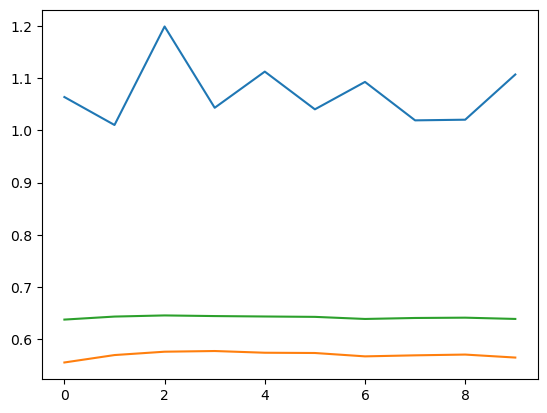

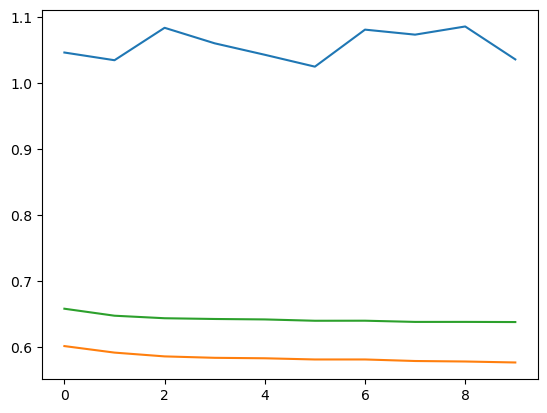

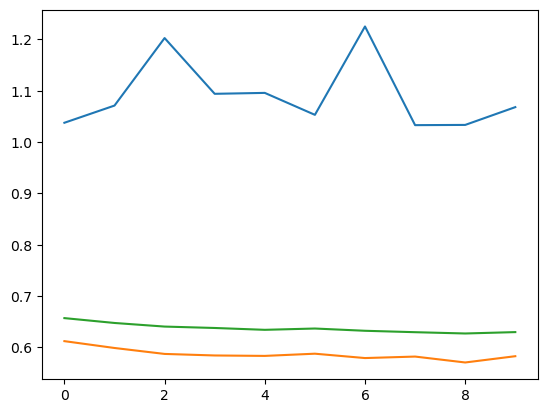

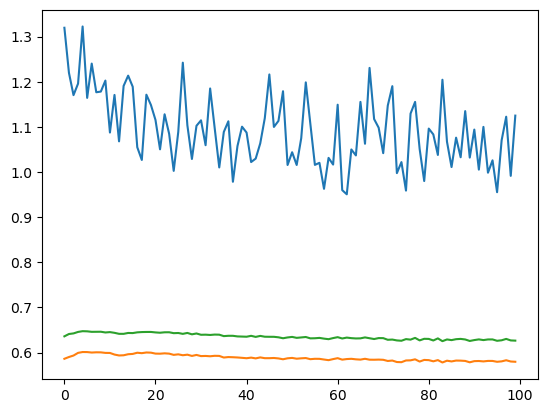

In [44]:
import matplotlib.pyplot as plt

#plot
for i in histories:
    plt.plot(i.index, "LOSS", data=i)
    plt.plot(i.index, "AUC", data=i)
    plt.plot(i.index, "AVG_PREC", data=i)
    plt.show()